# Pair Trading With Cryptos Part 1

## How To Scrape Cryptocurrency Data Using Python

## Introduction

Cryptocurrencies (or cryptos) captured the world's imagination during the last couple of years. From their spectacular rise in 2017, to their equally hard fall in 2018, and to their most recent revival this year. Cryptocurrencies and the blockchain engine powering them are regarded as disruptive forces proposing an alternative decentralized monetary system. They also garnered their fair share of criticism. Cryptocurrencies are accused of facilitating transfer of 'dirty money' between criminals. Due to the extremely volatile returns they provide, cryptocurrencies earned the reputation of being a 'get rich quick' scheme.

In this article, we focus on cryptocurrencies as investment vehicles sharing common features with FX, commodities and precious metals. Both crypto and fiat currencies allow for wealth transfer. Cryptocurrencies are similar to commodities because both have limited supply. They also draw comparisons to gold which is viewed by many as a "safe-haven" investment. 

The research is divided in two parts. In this article, I will demonstrate how to retrieve cryptocurrency historical data from the web. In the next article, I will illustrate how to backest a pair-trading strategy using the data sourced here.

## Retrieving Cryptocurrencies Historical Data

We retrieve data mainly through databases, APIs and web pages. As I don't have access to a database providing cryptocurrency historical data. I will use APIs and scrape web pages to retrieve cryptocurrency data necessary for backtesting purposes.

### Step By Step
1. Via APIs
2. Via Scraping

You can find the code on https://github.com/DinodC/pair-trading-cryptos.


## Via APIs
APIs provide a convenient way to source data from providers, exchanges and other platforms.

### 1. Quandl

[Quandl](https://www.quandl.com) is a financial, economic and alternative data provider. It specializes in distributing alternative data to investment firms, arguing that non-traditional data is an untapped source of alpha. Quandl sources data from various providers such as exchanges, tech firms and other private companies. It has free and premium datasets to choose from. 

To pull data from Quandl, you need to:
1. Register with Quandl to get an API key, it is free of charge.
2. Pull data from Quandl using their API, or you can use Python, R and Excel.
3. If you use Python, then you need to install Quandl Python package quandl or pandas-datareader.

Here we use quandl package to retrieve cryptocurreny data from Bitfinex and GDAX datasets. 

### Bitfinex 

[Bitfinex](https://www.bitfinex.com) is one of the largest cryptocurrency trading platforms in the world, and is headquartered in Hong Kong. It provides an extensive list of crypto-to-crypto and crypto-to-fiat datasets. Pulled data using quandl's get function is in a convenient DataFrame object. A drawback is the limited OHLCV(Open-High-Low-Close-Volume) historical data spanning 2 years only.

In [1]:
# # Quandl Python package
# import quandl

# # Set API key
# quandl.ApiConfig.api_key = 'Your API Authentication Key'

# # Set parameters
# start = '2009-01-01'
# exchange = 'BITFINEX'
# id = 'ETHUSD'

# data = quandl.get(exchange + '/' + id, start_date=start)

### GDAX (Global Digital Asset Exchange) 

[GDAX](https://pro.coinbase.com) is a popular cryptocurrency exchange headquartered in San Francisco, California. It was formerly known as Coinbase Exchange. Pulled OHLCV historical data from GDAX spans 3y, which is longer than Bitfinex datasets. Pulled data using quandl's get function is in a convenient DataFrame object. A drawback is the limited number of cryptocurrency datasets compared to Bitfinex.

In [2]:
# # Quandl Python package
# import quandl

# # Set API key
# quandl.ApiConfig.api_key = 'Your API Authentication Key'

# # Set parameters
# start = '2009-01-01'
# exchange = 'GDAX'
# id = 'ETH_USD'

# data = quandl.get(exchange + '/' + id, start_date=start)

### 2. CoinAPI

[CoinAPI](https://www.coinapi.io) is a one-stop shop providing cryptocurrency data from various exchanges such as GDAX, Huobi, Kraken, etc. It provides data via their API and other channels as well. Here, I will use CoinAPI's free registration to pull cryptocurrency data.

To pull data from CoinAPI, you need to:
1. Register with CoinAPI to get an API key for authenticating requests.
2. Pull data from CoinAPI using their API, or you can use Python, Java, C#, and etc.
3. If you use Python, then you need to install Python package requests to source data from CoinAPI.

CoinAPI provides a rich list of cryptocrurencies and exchanges to collect data from. Note that under the free subscription, requests are limited to 100 per day. Also, historical OHLCV data per request is limited to a 100 data points. CoinAPI returns data in JSON format. 

In [3]:
import requests

start = '2009-01-01'
exchange = 'BITSTAMP'
id = 'ETH'
period = '1DAY'

url = 'https://rest.coinapi.io/v1/ohlcv/' + exchange + '_SPOT_' + id + '_USD/history?period_id=' + period + '&time_start=' + start + 'T00:00:00'
headers = {'X-CoinAPI-Key' : '294BBC7C-E7FB-4CE0-97E3-D5CF60005B81'}
response = requests.get(url, headers=headers)

## Via Scraping
Scraping provides a straightforward way of sourcing data from a web page.

### CoinMarketCap

[CoinMarketCap](https://coinmarketcap.com) provides cryptocurrency data by pulling information from different exchanges. 
It queries cryptocurrency data from the exchanges, processes and delivers it through their website. 
CoinMarketCap has specific guidelines for cryptocurrencies and exchanges on how to be listed on the platform.

You can pull data from CoinMarketCap via their API but their free registration doesn't include historical data.
I will illustrate step-by-step how to retrieve historical OHLCV by scraping their website.
Python package BeautifulSoup is used to collect data from CoinMarketCap.

CoinMarketCap provides an extensive list of crypto-to-crypto and crypto-to-fiat data.
Cryptocurrency OHLCV historical data spans more than 5 years e.g. BTCUSD, LTCUSD and XRPUSD.
A limitation from scraping CoinMarketCap is data type inconsistency for volume and market cap data.

### Scrape Cryptocurrency Data From CoinMarketCap

We scrape data as follows:
1. Identify the cryptocurrencies and their corresponding URL. 
2. Scrape data from the URLs using Python packages requests and BeautifulSoup.

Note that I scraped data for the top 5 cryptocurrencies (Bitcoin, Ethereum, Litcoin and Ripple) with respect to their market capitalization. I excluded Bitcoin Cash because it has limited historical data.

Import packages

In [4]:
from requests import get

In [5]:
from bs4 import BeautifulSoup

In [6]:
import pandas as pd

In [7]:
from pandas import DataFrame

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pickle

In [10]:
%matplotlib inline

### Identify Cryptocurrencies

Set cryptocurrency ids

In [11]:
id = ['BTC', 'ETH', 'XRP', 'LTC']

Create a dictionary mapping cryptocurrency ids to their URLs

In [12]:
url = {'BTC': 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190521',
       'ETH': 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20190521',
       'XRP': 'https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20190521',
       'LTC': 'https://coinmarketcap.com/currencies/litecoin/historical-data/?start=20130428&end=20190525'}

### Scrape Data

Before pulling data, recall that I identified an inconsistency on volume and market cap data type:
1. There are str and float in the volume and market cap Series.
2. I created function my_convert to correct for this.

In [13]:
def my_convert(string):
    
    res = 0.0
    
    if string == 'NaN':
        res = string
    elif string == '-':
        res = 0.0
    elif type(string) == str:
        res = string.replace(',', '')
        res = float(res)
    else:
        pass
    
    return res

To retrieve cryptocurrency historical data, we run the script below

In [14]:
# Create a list for concat
data_list = []

for i in id:
    
    # Retrieve data from URL
    response = get(url[i])
    
    # Create soup
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find OHLCV table
    ohlcv_table = html_soup.find_all('tr', class_='text-right')
    
    # Store in a dictionary
    data = {}
    for j in range(len(ohlcv_table)):
        ohlcv_row = ohlcv_table[j].text.split('\n')
        data[ohlcv_row[1]] = [float(ohlcv_row[2]), # Open
                              float(ohlcv_row[3]), # High
                              float(ohlcv_row[4]), # Low
                              float(ohlcv_row[5]), # Close
                              my_convert(ohlcv_row[6]), # Volume
                              my_convert(ohlcv_row[7])] # Market cap
        
    # Store in a DataFrame
    data_df = pd.DataFrame.from_dict(data, orient='index')
        
    # Rename columns
    data_df.columns = pd.MultiIndex.from_product([[i], ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])
    
    # Convert index to DateTimeIndex
    data_df.index = pd.to_datetime(data_df.index)
    
    # Append to list
    data_list.append(data_df)
    
# Create DataFrame containing all the cryptos
crypto = pd.concat(data_list, axis=1)  

Check the collected data

In [15]:
crypto.head()

BTC                                               ETH           \
              Open    High     Low   Close Volume    Market Cap Open High Low   
2013-04-28  135.30  135.98  132.10  134.21    0.0  1.488567e+09  NaN  NaN NaN   
2013-04-29  134.44  147.49  134.00  144.54    0.0  1.603769e+09  NaN  NaN NaN   
2013-04-30  144.00  146.93  134.05  139.00    0.0  1.542813e+09  NaN  NaN NaN   
2013-05-01  139.00  139.89  107.72  116.99    0.0  1.298955e+09  NaN  NaN NaN   
2013-05-02  116.38  125.60   92.28  105.21    0.0  1.168517e+09  NaN  NaN NaN   

                     ...     XRP                           LTC              \
           Close     ...     Low Close Volume Market Cap  Open  High   Low   
2013-04-28   NaN     ...     NaN   NaN    NaN        NaN  4.30  4.40  4.18   
2013-04-29   NaN     ...     NaN   NaN    NaN        NaN  4.37  4.57  4.23   
2013-04-30   NaN     ...     NaN   NaN    NaN        NaN  4.40  4.57  4.17   
2013-05-01   NaN     ...     NaN   NaN    NaN        NaN  4.29  4.36  3.52   
2013-05-02   NaN     ...     NaN   NaN    NaN        NaN  3.78  4.04  3.01   

                                     
           Close Volume  Market Cap  
2013-04-28  4.35    0.0  74636938.0  
2013-04-29  4.38    0.0  75388964.0  
2013-04-30  4.30    0.0  74020918.0  
2013-05-01  3.80    0.0  65604596.0  
2013-05-02  3.37    0.0  58287979.0  

[5 rows x 24 columns]

In [16]:
crypto.tail()

BTC                                                         \
               Open     High      Low    Close        Volume    Market Cap   
2019-05-21  7977.97  8062.17  7843.34  7963.33  2.512725e+10  1.410656e+11   
2019-05-22      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-23      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-24      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-25      NaN      NaN      NaN      NaN           NaN           NaN   

               ETH                             ...            XRP            \
              Open    High    Low   Close      ...            Low     Close   
2019-05-21  251.65  262.11  248.2  255.22      ...       0.389302  0.397603   
2019-05-22     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-23     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-24     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-25     NaN     NaN    NaN     NaN      ...            NaN       NaN   

                                           LTC                         \
                  Volume    Market Cap    Open    High    Low   Close   
2019-05-21  1.811582e+09  1.674573e+10   91.57   92.44  89.59   91.51   
2019-05-22           NaN           NaN   91.51   92.00  87.55   88.21   
2019-05-23           NaN           NaN   88.20   89.74  85.23   89.18   
2019-05-24           NaN           NaN   88.97  102.75  88.32   99.90   
2019-05-25           NaN           NaN  100.05  104.11  98.72  102.67   

                                        
                  Volume    Market Cap  
2019-05-21  3.145769e+09  5.662154e+09  
2019-05-22  3.398528e+09  5.459427e+09  
2019-05-23  3.208807e+09  5.520439e+09  
2019-05-24  5.393658e+09  6.185976e+09  
2019-05-25  4.507357e+09  6.358964e+09  

[5 rows x 24 columns]

Plot the data

In [17]:
id

['BTC', 'ETH', 'XRP', 'LTC']

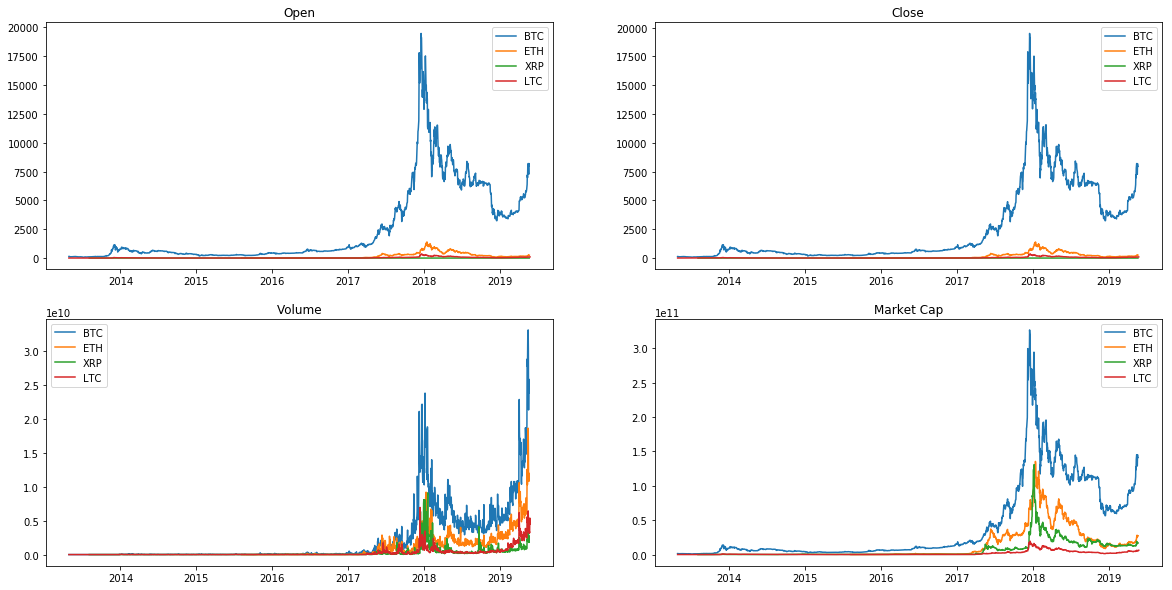

In [18]:
# Adjust plot size
plt.figure(figsize=[20, 10])

# Open
plt.subplot(2, 2, 1)
plt.plot(crypto.BTC.Open)
plt.plot(crypto.ETH.Open)
plt.plot(crypto.XRP.Open)
plt.plot(crypto.LTC.Open)
plt.title('Open')
plt.legend(id)

# Close
plt.subplot(2, 2, 2)
plt.plot(crypto.BTC.Close)
plt.plot(crypto.ETH.Close)
plt.plot(crypto.XRP.Close)
plt.plot(crypto.LTC.Close)
plt.title('Close')
plt.legend(id)

# Volume
plt.subplot(2, 2, 3)
plt.plot(crypto.BTC.Volume)
plt.plot(crypto.ETH.Volume)
plt.plot(crypto.XRP.Volume)
plt.plot(crypto.LTC.Volume)
plt.title('Volume')
plt.legend(id)

# Market cap
plt.subplot(2, 2, 4)
plt.plot(crypto.BTC['Market Cap'])
plt.plot(crypto.ETH['Market Cap'])
plt.plot(crypto.XRP['Market Cap'])
plt.plot(crypto.LTC['Market Cap'])
plt.title('Market Cap')
plt.legend(id)

Save data

In [19]:
with open('data_coinmarketcap.pickle', 'wb') as f:
    pickle.dump(crypto, f)
    
f.close()

## Conclusion

In this article, we identifed sources of cryptocurrency historical data such as APIs and web scraping. Using APIs provides a convenient way of retrieving data. A drawback using APIs, under the free subscription plan, is the limited historical data collected. Scraping websites requires a bit more effort than using APIs, but offers extensive datasets. In the next article, we will use the historical data collected here to backtest a pair-trading strategy involving cryptocurrencies.